In [11]:
# Step 1: Import necessary libraries
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [12]:
# Step 2: Load the dataset
df = pd.read_csv('C:\\Users\\User\\Desktop\\Lubna- DSML class\\ml\\Employee.csv')


In [13]:
df.head()

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0


In [14]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 Company     8
Age        18
Salary     24
Place      14
Country     0
Gender      0
dtype: int64


In [15]:
# Option 1: Fill with mean/median/mode or drop rows
df_filled = df.copy()

for column in df_filled.columns:
    if df_filled[column].dtype in ['float64', 'int64']:
        df_filled[column].fillna(df_filled[column].median(), inplace=True)
    else:
        df_filled[column].fillna(df_filled[column].mode()[0], inplace=True)


In [16]:
# Check for missing values again
missing_values1 = df_filled.isnull().sum()
print("Missing values per column:\n", missing_values1)

Missing values per column:
 Company    0
Age        0
Salary     0
Place      0
Country    0
Gender     0
dtype: int64


In [17]:
# Using IQR method
numeric_cols = df_filled.select_dtypes(include=np.number).columns

for col in numeric_cols:
    Q1 = df_filled[col].quantile(0.25)
    Q3 = df_filled[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    # Replace outliers with median
    median = df_filled[col].median()
    df_filled[col] = np.where((df_filled[col] < lower) | (df_filled[col] > upper), median, df_filled[col])


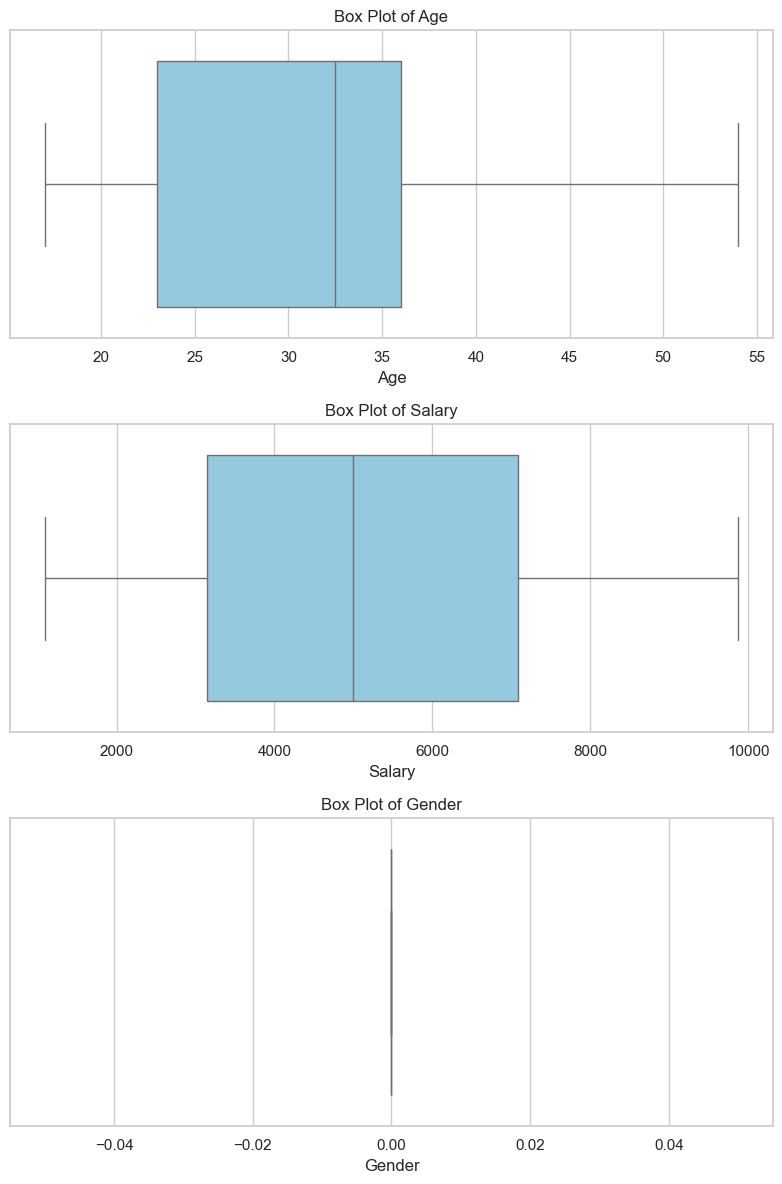

In [18]:
# Set plot style
sns.set(style="whitegrid")

# Create box plots for each numeric column
numeric_cols = df_filled.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(8,len(numeric_cols)*4))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 1, i)
    sns.boxplot(x=df_filled[col], color='skyblue')
    plt.title(f'Box Plot of {col}', fontsize=12)
    plt.xlabel(col)

plt.tight_layout()
plt.show()


In [19]:
# Convert column names to lowercase and strip spaces
df_filled.columns = [col.strip().lower().replace(" ", "_") for col in df_filled.columns]

# Example: standardize strings in a 'department' column
if 'department' in df_filled.columns:
    df_filled['department'] = df_filled['department'].str.strip().str.lower()


In [21]:
print(df_filled)

     company   age  salary     place country  gender
0        TCS  20.0  5000.0   Chennai   India     0.0
1    Infosys  30.0  5000.0    Mumbai   India     0.0
2        TCS  35.0  2300.0  Calcutta   India     0.0
3    Infosys  40.0  3000.0     Delhi   India     0.0
4        TCS  23.0  4000.0    Mumbai   India     0.0
..       ...   ...     ...       ...     ...     ...
143      TCS  33.0  9024.0  Calcutta   India     0.0
144  Infosys  22.0  8787.0  Calcutta   India     0.0
145  Infosys  44.0  4034.0     Delhi   India     0.0
146      TCS  33.0  5034.0    Mumbai   India     0.0
147  Infosys  22.0  8202.0    Cochin   India     0.0

[148 rows x 6 columns]


In [ ]:
# Example of smoothing for noisy data in numeric columns (rolling mean)
for col in numeric_cols:
    df_filled[col] = df_filled[col].rolling(window=3, min_periods=1).mean()


In [23]:
# Display cleaned dataset
df_filled.head()


,company,age,salary,place,country,gender
0,TCS,20.0,5000.0,Chennai,India,0.0
1,Infosys,30.0,5000.0,Mumbai,India,0.0
2,TCS,35.0,2300.0,Calcutta,India,0.0
3,Infosys,40.0,3000.0,Delhi,India,0.0
4,TCS,23.0,4000.0,Mumbai,India,0.0


In [24]:
df_filled.duplicated().sum()

8

In [25]:
df_filled.drop_duplicates(inplace=True)

In [26]:
df_filled.duplicated().sum()

0

In [27]:
# Optionally, save the cleaned data
df_filled.to_csv('C:\\Users\\User\\Desktop\\Lubna- DSML class\\ml\\Employee_Cleaned.csv', index=False)


In [28]:
# Load cleaned dataset
df_cleaned = pd.read_csv('C:\\Users\\User\\Desktop\\Lubna- DSML class\\ml\\Employee_Cleaned.csv')

In [29]:
df_cleaned.head()

,company,age,salary,place,country,gender
0,TCS,20.0,5000.0,Chennai,India,0.0
1,Infosys,30.0,5000.0,Mumbai,India,0.0
2,TCS,35.0,2300.0,Calcutta,India,0.0
3,Infosys,40.0,3000.0,Delhi,India,0.0
4,TCS,23.0,4000.0,Mumbai,India,0.0


In [30]:
# Loop through all columns to print unique values and their count
for col in df_cleaned.columns:
    unique_vals = df_cleaned[col].unique()
    print(f"Column: {col}")
    print(f"Unique Values ({len(unique_vals)}): {unique_vals}\n")


Column: company
Unique Values (6): ['TCS' 'Infosys' 'CTS' 'Tata Consultancy Services' 'Congnizant'
 'Infosys Pvt Lmt']

Column: age
Unique Values (29): [20.  30.  35.  40.  23.  32.5 34.  45.  18.  22.  32.  37.  50.  21.
 46.  36.  26.  41.  24.  25.  43.  19.  38.  51.  31.  44.  33.  17.
 54. ]

Column: salary
Unique Values (40): [5000. 2300. 3000. 4000. 6000. 7000. 8000. 9000. 1089. 1234. 3030. 3045.
 3184. 4824. 5835. 7084. 8943. 8345. 9284. 9876. 2034. 7654. 2934. 4034.
 5034. 8202. 9024. 4345. 6544. 6543. 3234. 4324. 5435. 5555. 8787. 3454.
 5654. 5009. 5098. 3033.]

Column: place
Unique Values (11): ['Chennai' 'Mumbai' 'Calcutta' 'Delhi' 'Podicherry' 'Cochin' 'Noida'
 'Hyderabad' 'Bhopal' 'Nagpur' 'Pune']

Column: country
Unique Values (1): ['India']

Column: gender
Unique Values (1): [0.]



In [32]:
# Summary statistics for numeric features
df_cleaned.describe(include='all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
company,140,6,TCS,59,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,140.0,NaN,NaN,NaN,32.167857,8.203265,17.0,24.0,32.5,36.0,54.0
salary,140.0,NaN,NaN,NaN,5201.735714,2369.767237,1089.0,3045.0,5000.0,7084.0,9876.0
place,140,11,Mumbai,47,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,140,1,India,140,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,140.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
# Clean column names: lowercase, strip spaces, replace spaces with underscores
df_cleaned.columns = [col.strip().lower().replace(" ", "_") for col in df_cleaned.columns]

# Optionally print new column names
print("Renamed Columns:\n", df_cleaned.columns.tolist())

Renamed Columns:
 ['company', 'age', 'salary', 'place', 'country', 'gender']


In [34]:
# Check column data types
print("\nData Types:\n", df_cleaned.dtypes)


Data Types:
 company     object
age        float64
salary     float64
place       object
country     object
gender     float64
dtype: object


In [35]:
# Confirm there are no missing values left
print("\nMissing Values:\n", df_cleaned.isnull().sum())


Missing Values:
 company    0
age        0
salary     0
place      0
country    0
gender     0
dtype: int64


In [36]:
# Make a copy to avoid modifying the original directly
df_cleaned_1 = df_cleaned.copy()

In [37]:
# Show missing values
print("Missing values per column:\n", df_cleaned_1.isnull().sum())

Missing values per column:
 company    0
age        0
salary     0
place      0
country    0
gender     0
dtype: int64


In [38]:

# Check for inappropriate values like 0 in age (assuming 'age' column exists)
if 'age' in df_cleaned_1.columns:
    print("\nNumber of entries with age == 0:", (df_cleaned_1['age'] == 0).sum())



Number of entries with age == 0: 0


In [39]:
# Replace age == 0 with NaN (inappropriate value)
df_cleaned_1['age'] = df_cleaned_1['age'].replace(0, np.nan)


In [42]:
df_cleaned_1.head()

,company,age,salary,place,country,gender
0,TCS,20.0,5000.0,Chennai,India,0.0
1,Infosys,30.0,5000.0,Mumbai,India,0.0
2,TCS,35.0,2300.0,Calcutta,India,0.0
3,Infosys,40.0,3000.0,Delhi,India,0.0
4,TCS,23.0,4000.0,Mumbai,India,0.0


In [45]:
# Count duplicates
duplicates = df_cleaned_1.duplicated().sum()
print(f"\nDuplicate rows found: {duplicates}")

# Remove duplicates
df_cleaned_1 = df_cleaned_1.drop_duplicates()



Duplicate rows found: 0


In [47]:
# Detect outliers using IQR method and print count (for numeric columns only)
numeric_cols = df_cleaned_1.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    Q1 = df_cleaned_1[col].quantile(0.25)
    Q3 = df_cleaned_1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df_cleaned_1[(df_cleaned_1[col] < lower) | (df_cleaned_1[col] > upper)]
    print(f"{col}: {len(outliers)} outliers")


age: 0 outliers
salary: 0 outliers
gender: 0 outliers


In [48]:
# Fill nulls appropriately based on column type
for col in df_cleaned_1.columns:
    if df_cleaned_1[col].isnull().sum() > 0:
        if df_cleaned_1[col].dtype in ['int64', 'float64']:
            # Use median for numeric columns
            df_cleaned_1[col].fillna(df_cleaned_1[col].median(), inplace=True)
        else:
            # Use mode for categorical columns
            df_cleaned_1[col].fillna(df_cleaned_1[col].mode()[0], inplace=True)


In [49]:
# Final null check
print("\nMissing values after treatment:\n", df_cleaned_1.isnull().sum())



Missing values after treatment:
 company    0
age        0
salary     0
place      0
country    0
gender     0
dtype: int64


In [55]:
# Ensure age and salary columns are present
filtered_df = df_cleaned_1[(df_cleaned_1['age'] > 40) & (df_cleaned_1['salary'] < 5000)]

In [56]:
# Show the filtered data
filtered_df.head()

,company,age,salary,place,country,gender
21,Infosys,50.0,3184.0,Delhi,India,0.0
32,Infosys,45.0,4034.0,Calcutta,India,0.0
39,Infosys,41.0,3000.0,Mumbai,India,0.0
50,Infosys,41.0,3000.0,Chennai,India,0.0
57,Infosys,51.0,3184.0,Hyderabad,India,0.0


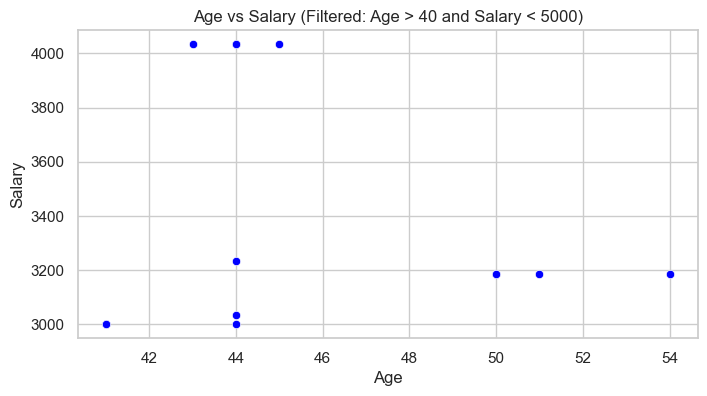

In [58]:
# Set the style
sns.set(style="whitegrid")

# Scatter plot
plt.figure(figsize=(8,4))
sns.scatterplot(data=filtered_df, x='age', y='salary', color='blue')
plt.title('Age vs Salary (Filtered: Age > 40 and Salary < 5000)')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()


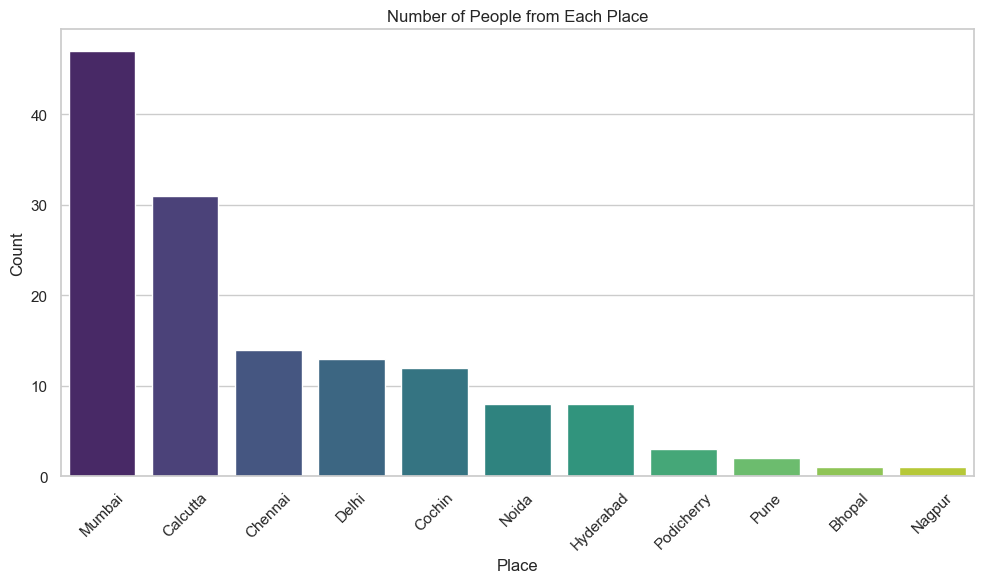

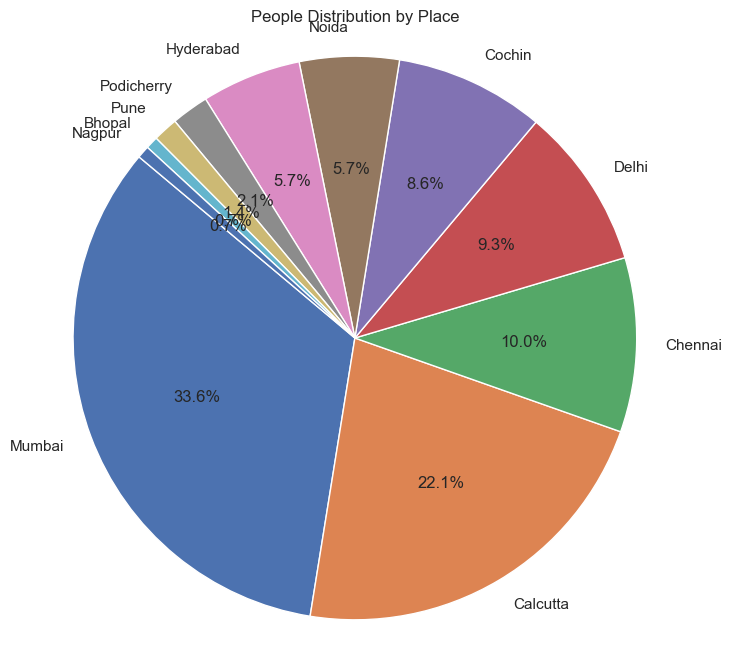

In [52]:
# Check if 'place' column exists (you may replace with actual column name)
place_col = 'place' if 'place' in df_cleaned_1.columns else None

if place_col:
    place_counts = df_cleaned_1[place_col].value_counts()

    # Bar Plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x=place_counts.index, y=place_counts.values, palette='viridis')
    plt.title('Number of People from Each Place')
    plt.xlabel('Place')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Pie Chart (optional)
    plt.figure(figsize=(8, 8))
    plt.pie(place_counts, labels=place_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title('People Distribution by Place')
    plt.axis('equal')
    plt.show()
else:
    print("Column 'place' not found in dataset. Please check the column name.")


The bar and pie charts illustrate the distribution of employees across different places, clearly showing which locations have higher or lower representation within the dataset for visual comparison.

In [53]:
# Identify categorical columns (object or category dtype)
categorical_cols = df_cleaned_1.select_dtypes(include=['object', 'category']).columns.tolist()
print("Categorical columns:", categorical_cols)


Categorical columns: ['company', 'place', 'country']


In [59]:
from sklearn.preprocessing import LabelEncoder

# Create a copy for encoding
# df_encoded = df_cleaned_1.copy()

# Apply Label Encoding to binary categorical columns
# label_encoder = LabelEncoder()
# for col in categorical_cols:
#     if df_encoded[col].nunique() == 2:
#         df_encoded[col] = label_encoder.fit_transform(df_encoded[col])
#         print(f"Label encoded: {col}")

# Create a copy of the original DataFrame
df_label_encoded = df_cleaned_1.copy()

# Initialize LabelEncoder for each categorical column
le_company = LabelEncoder()
le_place = LabelEncoder()
le_country = LabelEncoder()
# Fit and transform the categorical columns
df_label_encoded['company'] = le_company.fit_transform(df_label_encoded['company'])
df_label_encoded['place'] = le_place.fit_transform(df_label_encoded['place'])
df_label_encoded['country'] = le_country.fit_transform(df_label_encoded['country'])

print(df_label_encoded)

# # Apply One-Hot Encoding to remaining categorical columns
# df_encoded = pd.get_dummies(df_encoded, columns=[col for col in categorical_cols if df_cleaned_1[col].nunique() > 2], drop_first=True)

# Show the first few rows of encoded data
# df_encoded.head()


     company   age  salary  place  country  gender
0          4  20.0  5000.0      2        0     0.0
1          2  30.0  5000.0      6        0     0.0
2          4  35.0  2300.0      1        0     0.0
3          2  40.0  3000.0      4        0     0.0
4          4  23.0  4000.0      6        0     0.0
..       ...   ...     ...    ...      ...     ...
135        1  22.0  2934.0      8        0     0.0
136        2  44.0  4034.0      5        0     0.0
137        4  33.0  5034.0      1        0     0.0
138        3  22.0  8202.0      6        0     0.0
139        4  33.0  9024.0      1        0     0.0

[140 rows x 6 columns]


In [61]:
print("Shape before encoding:", df_cleaned_1.shape)
print("Shape after encoding :", df_encoded.shape)

Shape before encoding: (140, 6)
Shape after encoding : (140, 19)


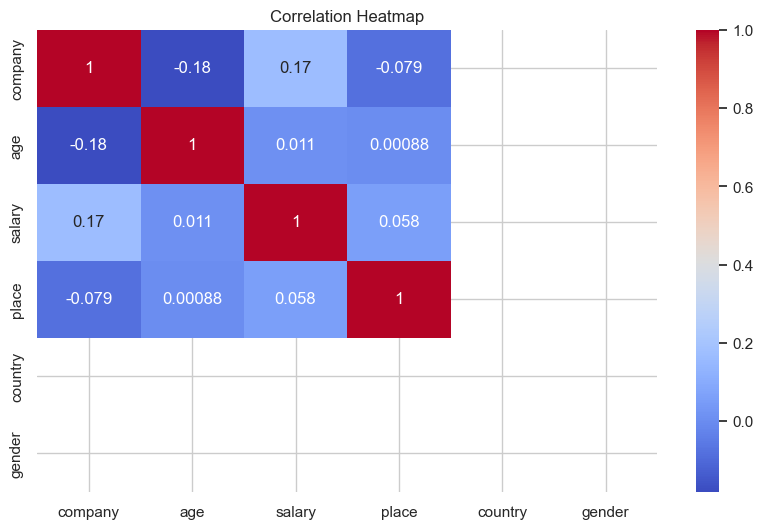

In [62]:
plt.figure(figsize=(10,6))
sns.heatmap(df_label_encoded.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [63]:
# Correlation with target variable
print(df_label_encoded.corr()['salary'].sort_values(ascending=False))

salary     1.000000
company    0.170276
place      0.057679
age        0.011404
country         NaN
gender          NaN
Name: salary, dtype: float64


In [78]:
from sklearn.feature_selection import SelectKBest, f_classif
# SelectKBest for feature selection
X = df_label_encoded.drop(columns=['salary'])  # Features
y = df_label_encoded['salary']  # Target

# Apply SelectKBest for feature selection
# selecting all columns to print select k best scores (here k =11 by excluding target)

select_k = SelectKBest(score_func=f_classif, k=3)  # Selecting top 3 features
X_selected = select_k.fit_transform(X, y)

# Get the names and scores of the selected features
selected_features = X.columns[select_k.get_support()]
selected_scores = select_k.scores_[select_k.get_support()] # to find scores of all features

print("Selected Features:", selected_features)
print("\nFeature Scores based on select_k:", selected_scores,"\n")


# Create a DataFrame to display feature names and scores
feature_scores_df = pd.DataFrame({'Feature': selected_features, 'Score': selected_scores})


# Sort by scores in ascending order
feature_scores_df = feature_scores_df.sort_values(by="Score", ascending=False)

# Print results
print("Selected Features:\n", feature_scores_df)

Selected Features: Index(['company', 'age', 'place'], dtype='object')

Feature Scores based on select_k: [6.52111952 5.07281965 0.68077994] 

Selected Features:
    Feature    Score
0  company  6.52112
1      age  5.07282
2    place  0.68078


In [79]:
df_label_encoded

,company,age,salary,place,country,gender
0,4,20.0,5000.0,2,0,0.0
1,2,30.0,5000.0,6,0,0.0
2,4,35.0,2300.0,1,0,0.0
3,2,40.0,3000.0,4,0,0.0
4,4,23.0,4000.0,6,0,0.0
...,...,...,...,...,...,...
135,1,22.0,2934.0,8,0,0.0
136,2,44.0,4034.0,5,0,0.0
137,4,33.0,5034.0,1,0,0.0
138,3,22.0,8202.0,6,0,0.0


In [80]:
# List of desired columns
selected_columns = ['company', 'age','salary','place']

# Create a new DataFrame with only the selected columns
new_data_2 = df_label_encoded[selected_columns]
new_data_2

,company,age,salary,place
0,4,20.0,5000.0,2
1,2,30.0,5000.0,6
2,4,35.0,2300.0,1
3,2,40.0,3000.0,4
4,4,23.0,4000.0,6
...,...,...,...,...
135,1,22.0,2934.0,8
136,2,44.0,4034.0,5
137,4,33.0,5034.0,1
138,3,22.0,8202.0,6


In [81]:
#  Split Data into Training and Testing Sets

from sklearn.model_selection import train_test_split

X = new_data_2.drop('salary',axis=1)
y = new_data_2['salary']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(112, 3) (28, 3) (112,) (28,)


In [82]:
X_train

,company,age,place
16,2,23.0,9
18,4,22.0,2
10,0,23.0,6
111,4,22.0,3
101,0,44.0,6
...,...,...,...
71,4,34.0,6
106,4,32.5,2
14,2,40.0,1
92,2,54.0,6


In [83]:
X_test

,company,age,place
108,4,33.0,1
67,1,21.0,6
31,0,20.0,6
119,0,44.0,5
42,4,32.5,6
12,0,45.0,2
81,0,43.0,10
69,4,32.0,3
104,4,33.0,6
109,4,33.0,4


In [84]:
y_train

16     3030.0
18     5000.0
10     5000.0
111    4324.0
101    5000.0
        ...  
71     9024.0
106    9024.0
14     3000.0
92     3184.0
102    2934.0
Name: salary, Length: 112, dtype: float64

In [85]:
y_test

108    5000.0
67     2934.0
31     2934.0
119    5000.0
42     6000.0
12     5000.0
81     9000.0
69     5034.0
104    5034.0
109    2300.0
113    5555.0
56     3045.0
66     5000.0
19     5000.0
132    5000.0
78     6000.0
11     1089.0
27     9284.0
127    3184.0
110    3234.0
36     5000.0
118    1089.0
60     7084.0
4      4000.0
131    9284.0
26     8345.0
138    8202.0
96     8943.0
Name: salary, dtype: float64

In [86]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [87]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

In [88]:
X_train_scaled #scaled

array([[-0.25563447, -1.05905208,  2.0289858 ],
       [ 0.98919424, -1.17977863, -0.91680099],
       [-1.50046318, -1.05905208,  0.76650575],
       [ 0.98919424, -1.17977863, -0.49597431],
       [-1.50046318,  1.47620542,  0.76650575],
       [-0.25563447,  0.08785012, -0.91680099],
       [ 0.98919424, -0.93832553,  0.76650575],
       [-1.50046318,  1.71765851,  0.34567906],
       [-1.50046318, -1.17977863,  2.44981248],
       [-0.25563447,  1.47620542,  0.34567906],
       [-1.50046318, -0.0932397 ,  0.34567906],
       [ 0.98919424, -1.42123172, -0.91680099],
       [-0.25563447,  0.02748685, -0.49597431],
       [-1.50046318, -1.05905208,  0.76650575],
       [ 0.98919424, -0.93832553, -1.33762768],
       [ 0.98919424,  0.08785012, -0.91680099],
       [ 0.98919424, -1.17977863, -1.33762768],
       [ 0.98919424,  0.1482134 ,  0.34567906],
       [-0.25563447,  0.08785012, -0.91680099],
       [ 0.98919424, -0.81759898,  1.60815912],
       [ 0.98919424,  0.38966649,  1.608

In [89]:
print(len(X_train_scaled[0]))

3


In [90]:
X_train_scaled.shape

(112, 3)

In [91]:
X_test

,company,age,place
108,4,33.0,1
67,1,21.0,6
31,0,20.0,6
119,0,44.0,5
42,4,32.5,6
12,0,45.0,2
81,0,43.0,10
69,4,32.0,3
104,4,33.0,6
109,4,33.0,4


In [92]:
from sklearn.preprocessing import StandardScaler

y_train_df = pd.DataFrame(y_train) #converting to data frame from series
scaler = StandardScaler()
scaler.fit(y_train_df)
y_train_scaled = scaler.transform(y_train_df)

In [93]:
y_train_scaled

array([[-0.91358195],
       [-0.08169902],
       [-0.08169902],
       [-0.36715732],
       [-0.08169902],
       [ 0.27090111],
       [-0.92625022],
       [ 1.60740339],
       [-0.08169902],
       [-0.48961725],
       [-1.33416845],
       [-0.08169902],
       [ 1.03902043],
       [ 1.97731681],
       [-0.35828954],
       [ 0.79832333],
       [-0.15601952],
       [-0.90724782],
       [ 0.10199087],
       [ 0.56987223],
       [ 1.18512778],
       [-0.92625022],
       [-0.08169902],
       [-0.92625022],
       [-0.15601952],
       [ 1.27042746],
       [-0.50397462],
       [-1.33416845],
       [-1.73321889],
       [ 1.03902043],
       [-1.73321889],
       [-0.08169902],
       [ 1.60740339],
       [-0.06734165],
       [-0.08169902],
       [ 1.58333368],
       [-0.92625022],
       [ 1.33081287],
       [-0.48961725],
       [-0.95412041],
       [-0.08169902],
       [-0.08169902],
       [ 1.18512778],
       [-0.92625022],
       [-1.67198893],
       [ 1

In [94]:
y_test

108    5000.0
67     2934.0
31     2934.0
119    5000.0
42     6000.0
12     5000.0
81     9000.0
69     5034.0
104    5034.0
109    2300.0
113    5555.0
56     3045.0
66     5000.0
19     5000.0
132    5000.0
78     6000.0
11     1089.0
27     9284.0
127    3184.0
110    3234.0
36     5000.0
118    1089.0
60     7084.0
4      4000.0
131    9284.0
26     8345.0
138    8202.0
96     8943.0
Name: salary, dtype: float64